<a href="https://colab.research.google.com/github/Talledo/Visualizacion_de_Datos/blob/main/Diabetes_ML_sin_misterior.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **¿ Qué algortimos vamos a trabajar en clase ?**

***Clasificación***

La clasificación es una subcategoría del aprendizaje supervisado en la que el objetivo es predecir las etiquetas de clase categóricas (discreta, valores no ordenados, pertenencia a grupo) de las nuevas instancias, basándonos en observaciones pasadas.

Hay dos tipos principales de clasificaciones:

**• Clasificación Binaria:** Es un tipo de clasificación en el que tan solo se pueden asignar dos clases diferentes (0 o 1). El ejemplo típico es la detección de email spam, en la que cada email es: spam → en cuyo caso será etiquetado con un 1 ; o no lo es → etiquetado con un 0.

**• Clasificación Multi-clase:** Se pueden asignar múltiples categorías a las observaciones. Como el reconocimiento de caracteres de escritura manual de números (en el que las clases van de 0 a 9).

**¿ Que otros ejemplos se les ocurren de clasificación ?**

*Fuente: https://medium.com/datos-y-ciencia/aprendizaje-supervisado-introducci%C3%B3n-a-la-clasificaci%C3%B3n-y-principales-algoritmos-dadee99c9407*



# Preparación de los datos y el módelo

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# set seed for reproducibility
SEED = 20
np.random.seed(SEED)

In [ ]:
# Loading Data
df = pd.read_csv('https://raw.githubusercontent.com/restevesd/diabetes-ml-apps/master/diabetes.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               15000 non-null  int64  
 1   Pregnancies             15000 non-null  int64  
 2   PlasmaGlucose           15000 non-null  int64  
 3   DiastolicBloodPressure  15000 non-null  int64  
 4   TricepsThickness        15000 non-null  int64  
 5   SerumInsulin            15000 non-null  int64  
 6   BMI                     15000 non-null  float64
 7   DiabetesPedigree        15000 non-null  float64
 8   Age                     15000 non-null  int64  
 9   Diabetic                15000 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 1.1 MB


In [ ]:
df.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0


**Vamos a utilizar solamente Glucosa y si tuvo diabetes o no **

In [ ]:
x = df[["PlasmaGlucose"]]
y = df["Diabetic"]

In [ ]:
y

0        0
1        0
2        0
3        1
4        0
        ..
14995    1
14996    1
14997    0
14998    0
14999    1
Name: Diabetic, Length: 15000, dtype: int64

In [ ]:
x

,PlasmaGlucose
0,171
1,92
2,115
3,103
4,85
...,...
14995,65
14996,73
14997,93
14998,132


**Train | Test**

Entre las herramientas de **Scikit-learn** nos podemos encontrar con la función train_test_split.

Una función que nos permite dividir un conjunto de datos en uno de entrenamiento y otro de test.

https://www.analyticslane.com/2020/04/20/entrenamiento-validacion-y-test-con-scikit-learn/

https://qu4nt.github.io/sklearn-doc-es/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train%20test#sklearn.model_selection.train_test_split



In [ ]:
df["Diabetic"].value_counts()

0    10000
1     5000
Name: Diabetic, dtype: int64

In [ ]:
#Keeping train  size as 0.8
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2,random_state=20)

**Regresión Logística**

• La regresión logística, a pesar de su nombre, es un modelo lineal de clasificación más que de regresión.

• La regresión logística también se conoce como regresión logit.

• En este modelo, las probabilidades que describen los posibles resultados de un único ensayo se modelan mediante una función logística.

https://www.iartificial.net/como-usar-regresion-logistica-en-python/

https://qu4nt.github.io/sklearn-doc-es/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression

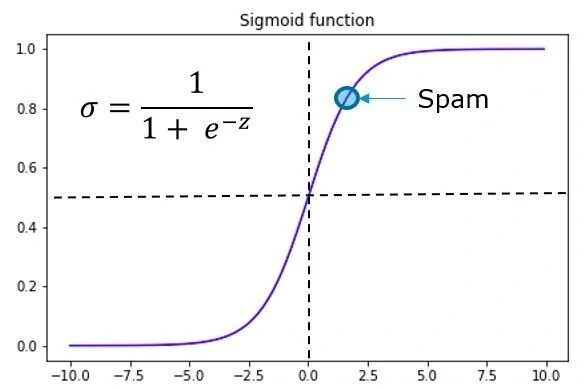

In [ ]:
# Lets try Logistic regression now
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
log_model = LogisticRegression()

In [ ]:
log_model_entrenado = log_model.fit(X_train,Y_train)

In [ ]:
log_pred=log_model_entrenado.predict(X_test)
lr = accuracy_score(Y_test, log_pred) * 100

In [ ]:
lr

67.06666666666666

# Matriz de confusión

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


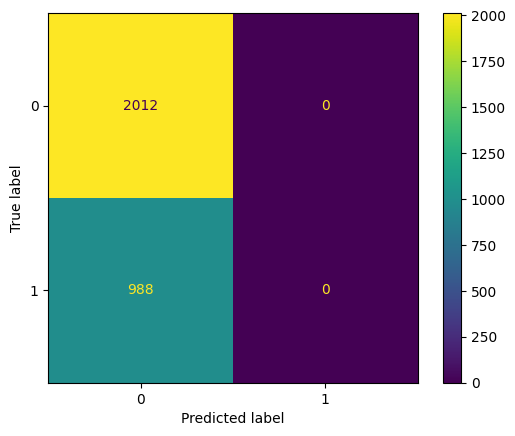

In [ ]:
cm = confusion_matrix(Y_test, log_pred, labels=log_model_entrenado.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=log_model_entrenado.classes_)
disp.plot()
plt.show()

**Probemos todas las variables**

In [ ]:
df.head(2)

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0


In [ ]:
X = df.drop("Diabetic",axis=1) #Elimina la columna target "Diabetic"
Y = df["Diabetic"]

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=20, stratify=Y)

In [ ]:
log_model = LogisticRegression()
log_model = log_model.fit(X_train,Y_train)
log_pred=log_model.predict(X_test)

In [ ]:
lr = accuracy_score(Y_test, log_pred) * 100
lr

66.66666666666666

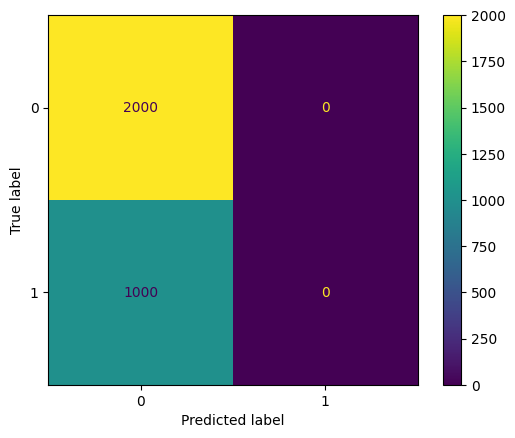

In [ ]:
cm = confusion_matrix(Y_test, log_pred, labels=log_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=log_model.classes_)
disp.plot()
plt.show()

# Veamos otro modelo

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X = df[["PlasmaGlucose"]]
Y = df["Diabetic"]

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=20, stratify=Y)

In [ ]:
log_model = RandomForestClassifier()
log_model = log_model.fit(X_train,Y_train)
log_pred=log_model.predict(X_test)

In [ ]:
lr = log_model.score(X_test, Y_test) * 100
lr

75.33333333333333

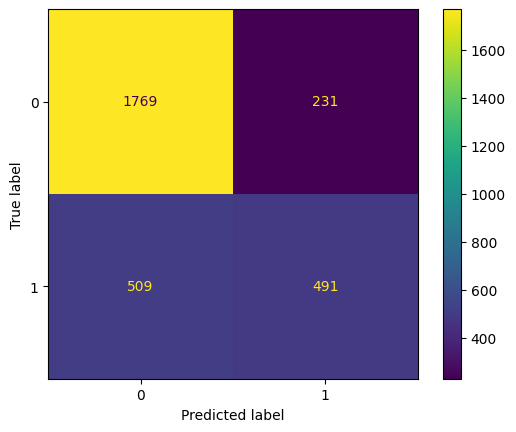

In [ ]:
cm = confusion_matrix(Y_test, log_pred, labels=log_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=log_model.classes_)
disp.plot()
plt.show()

# Probemos más variables

In [ ]:
X = df.drop(["PatientID","Diabetic"],axis=1) #Elimina la columna target "Diabetic"
Y = df["Diabetic"]

In [ ]:
X.head()

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age
0,0,171,80,34,23,43.509726,1.213191,21
1,8,92,93,47,36,21.240576,0.158365,23
2,7,115,47,52,35,41.511523,0.079019,23
3,9,103,78,25,304,29.582192,1.282870,43
4,1,85,59,27,35,42.604536,0.549542,22


In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=20, stratify=Y)

In [ ]:
log_model = RandomForestClassifier()
log_model = log_model.fit(X_train,Y_train)
log_pred=log_model.predict(X_test)

In [ ]:
lr = log_model.score(X_test, Y_test) * 100
lr

94.53333333333333

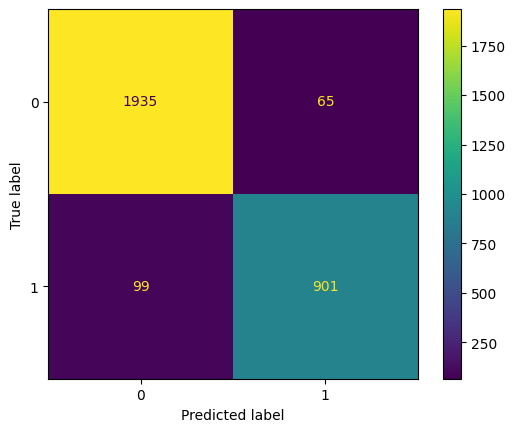

In [ ]:
cm = confusion_matrix(Y_test, log_pred, labels=log_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=log_model.classes_)
disp.plot()
plt.show()

# PKL

In [ ]:
import joblib

#pickle

model_filename = 'log_model.pkl'
joblib.dump(log_model, model_filename)

print("Modelo grabado!")

Modelo grabado!
